In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

from sklearn.datasets import load_wine

In [4]:
wine = load_wine()

df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df["target"] = wine.target

In [5]:
df.shape

(178, 14)

In [6]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [8]:
df['target'].unique()

array([0, 1, 2])

In [9]:
df.duplicated().sum()

0

In [10]:
df.rename(columns={"od280/od315_of_diluted_wines": "protein_concentration"}, inplace=True)

In [12]:
df["target"].value_counts(normalize=True)

1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64

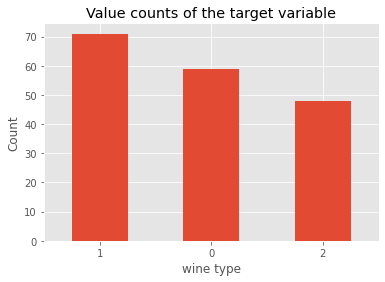

In [13]:
df['target'].value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("wine type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [14]:
df.magnesium.describe()

count    178.000000
mean      99.741573
std       14.282484
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: magnesium, dtype: float64

<AxesSubplot: ylabel='Frequency'>

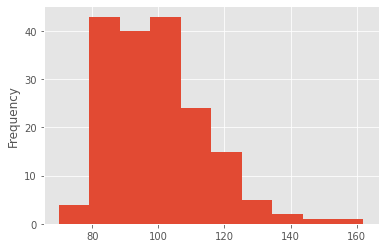

In [15]:
df['magnesium'].plot(kind='hist')

In [16]:
print(f"Skewness: {df['magnesium'].skew()}")
print(f"kurtosis: {df['magnesium'].kurt()}")

Skewness: 1.098191054755161
kurtosis: 2.1049913235905557


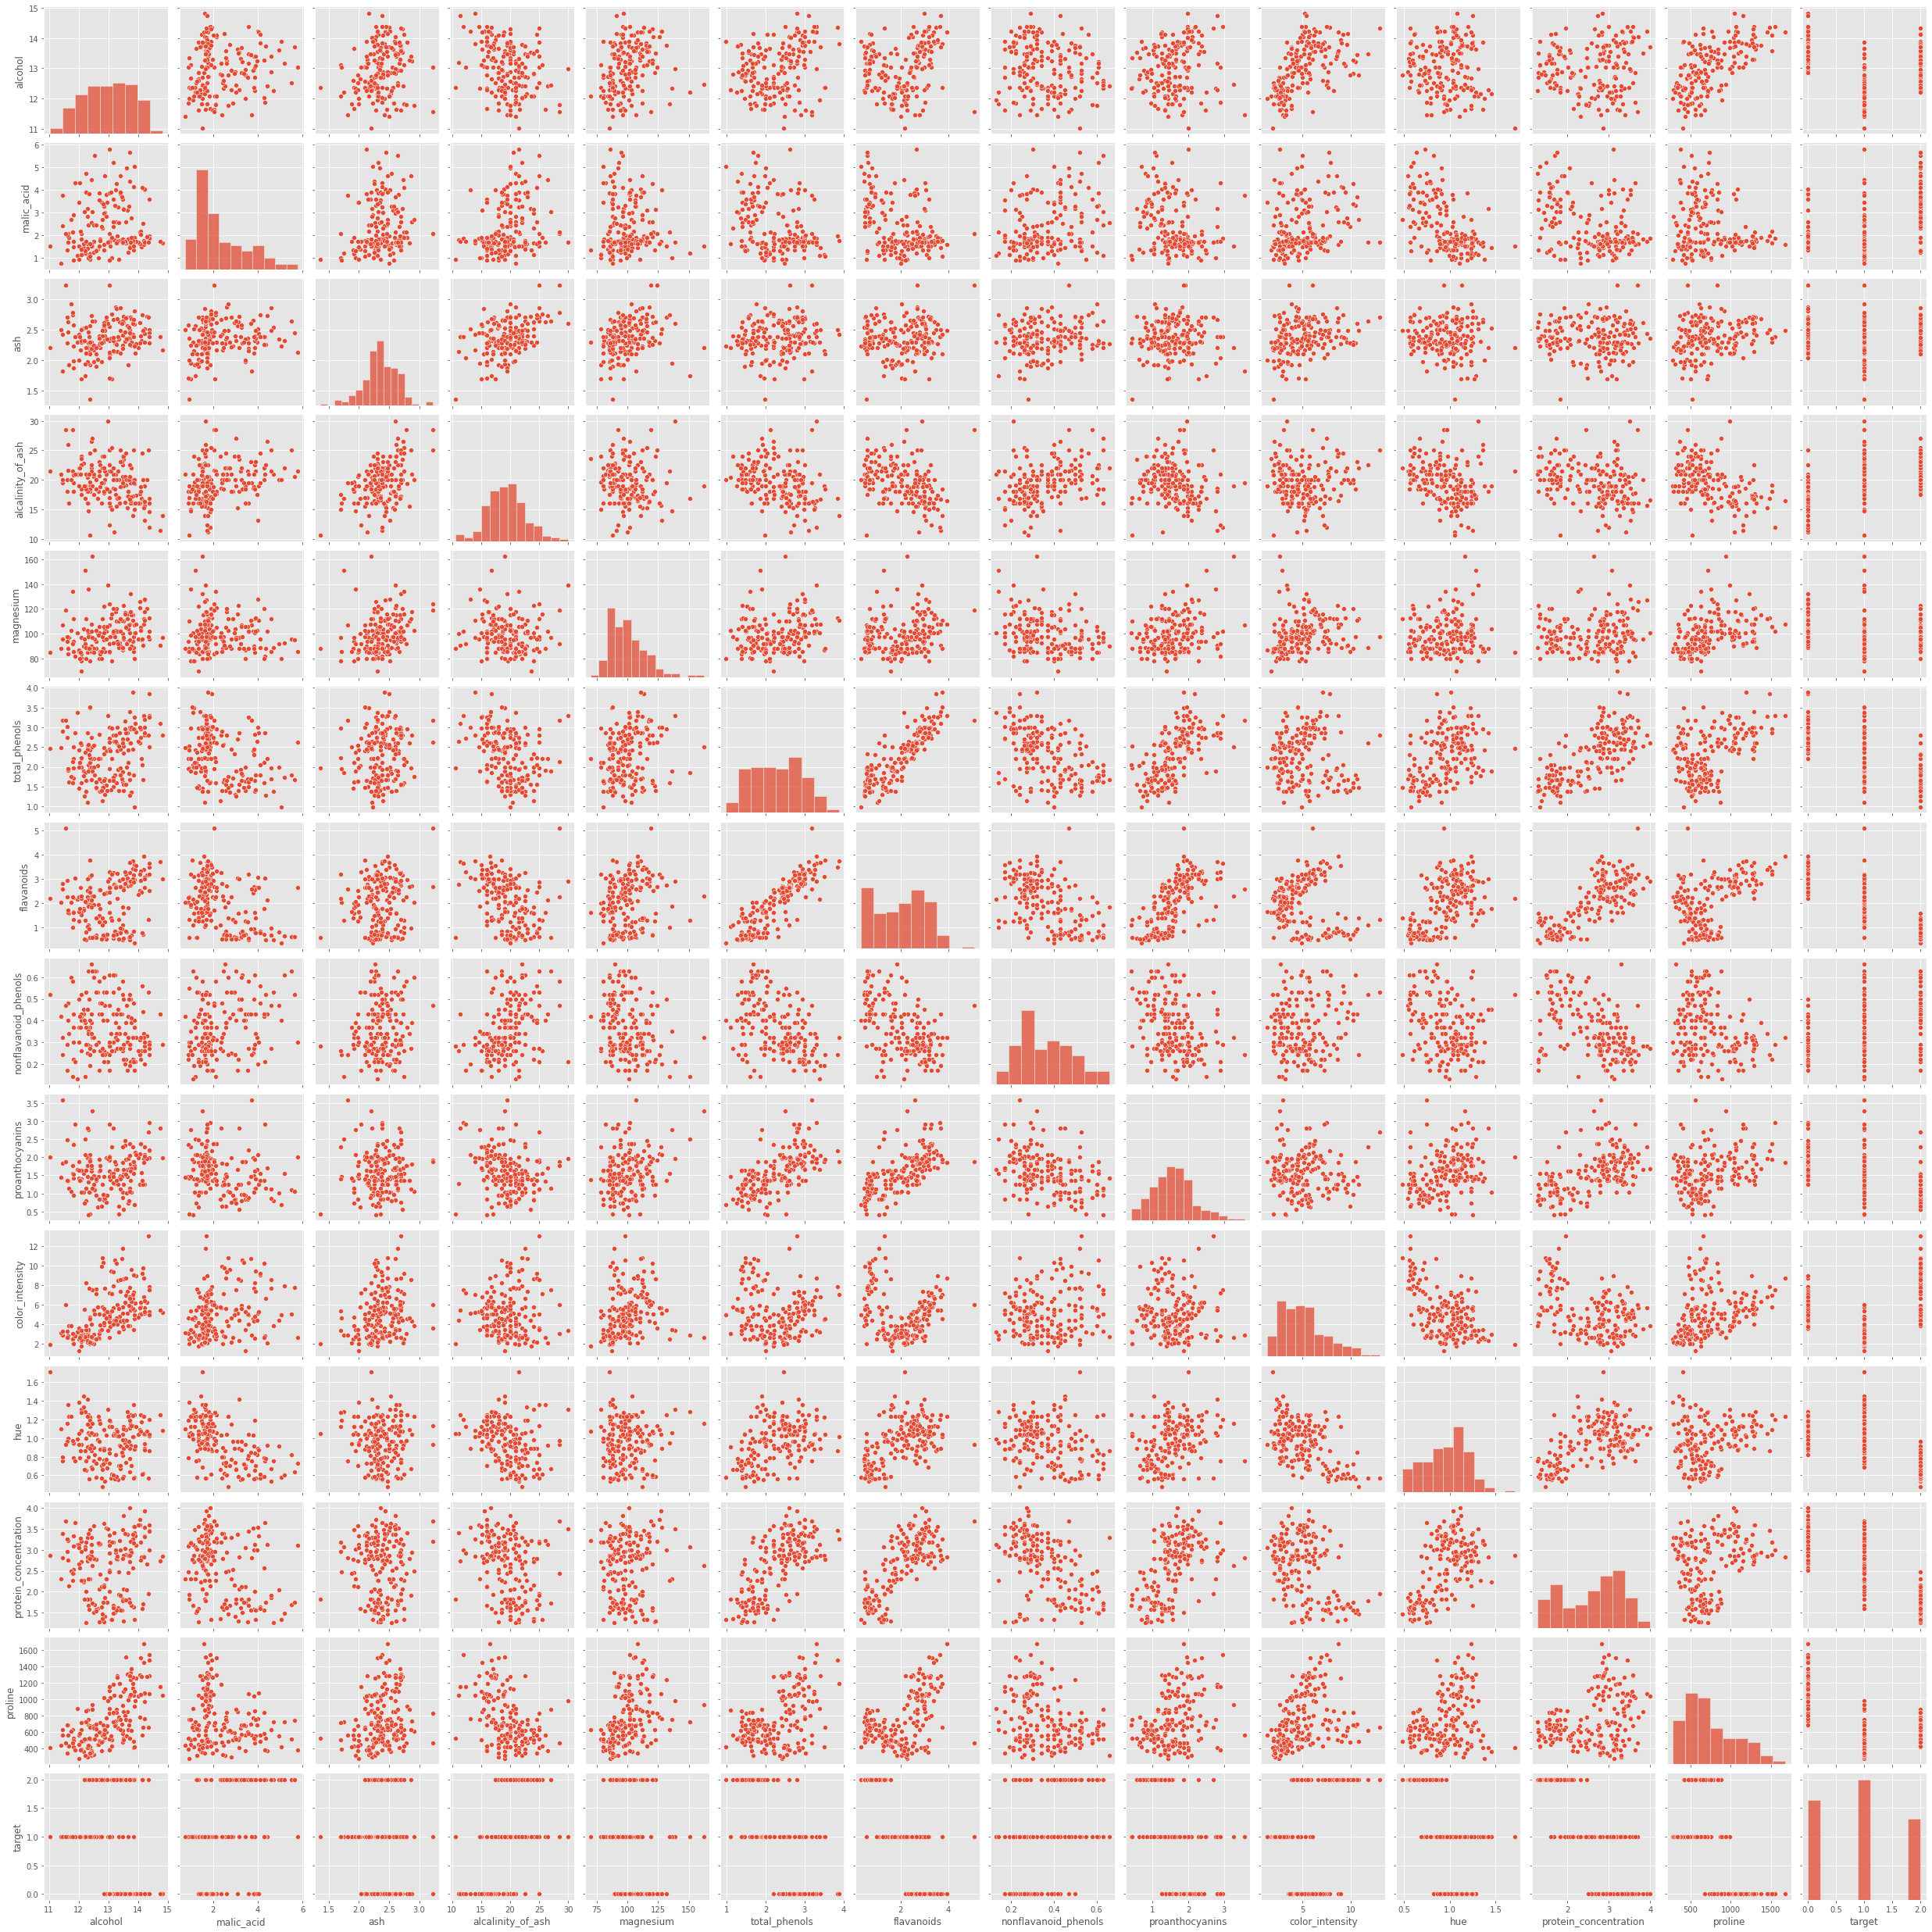

In [18]:
sns.pairplot(df)

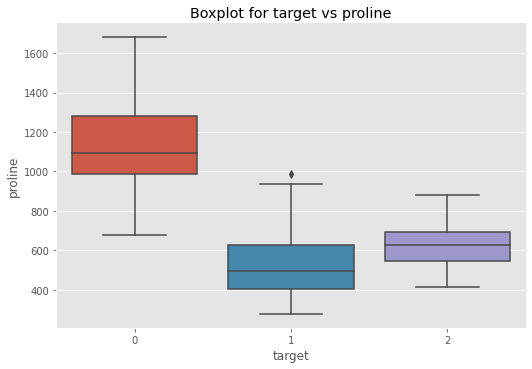

In [20]:
sns.catplot(x="target", y="proline", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for target vs proline")
plt.show()

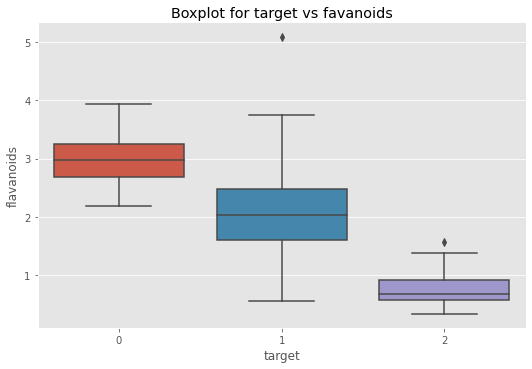

In [22]:
sns.catplot(x="target", y="flavanoids", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for target vs favanoids")
plt.show()

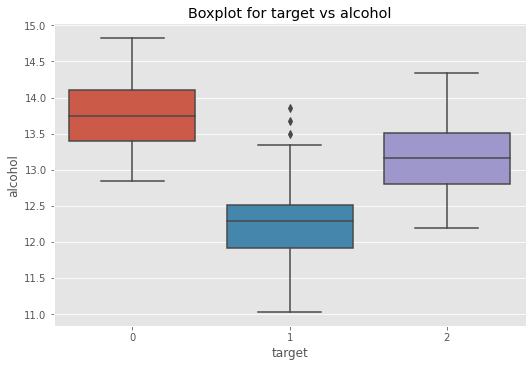

In [24]:
sns.catplot(data = df, x="target", y="alcohol", kind="box", aspect=1.5)
plt.title("Boxplot for target vs alcohol")
plt.show()

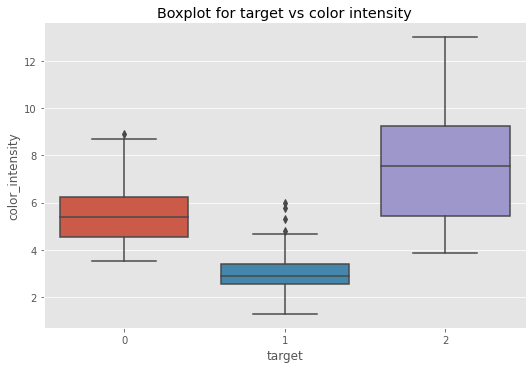

In [28]:
sns.catplot(data = df, x="target", y="color_intensity", kind="box", aspect=1.5)
plt.title("Boxplot for target vs color intensity")
plt.show()

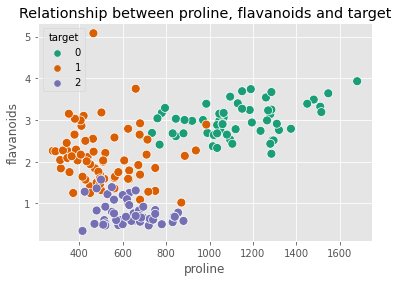

In [29]:
sns.scatterplot(x="proline", y="flavanoids", hue="target", data=df, palette="Dark2", s=80)
plt.title("Relationship between proline, flavanoids and target")
plt.show()

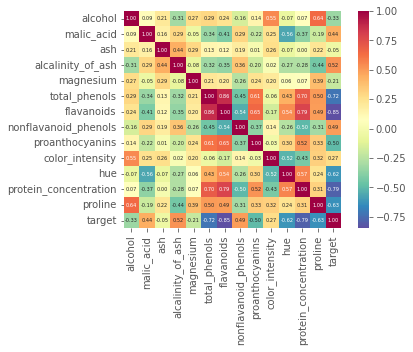

In [33]:
corrmat = df.corr()
hm = sns.heatmap(corrmat,
                 cbar= True,
                 annot=True,
                 square=True,
                 fmt=".2f",
                 annot_kws={'size': 5},
                 yticklabels=df.columns,
                 xticklabels=df.columns,
                 cmap="Spectral_r"
                 )
plt.show()